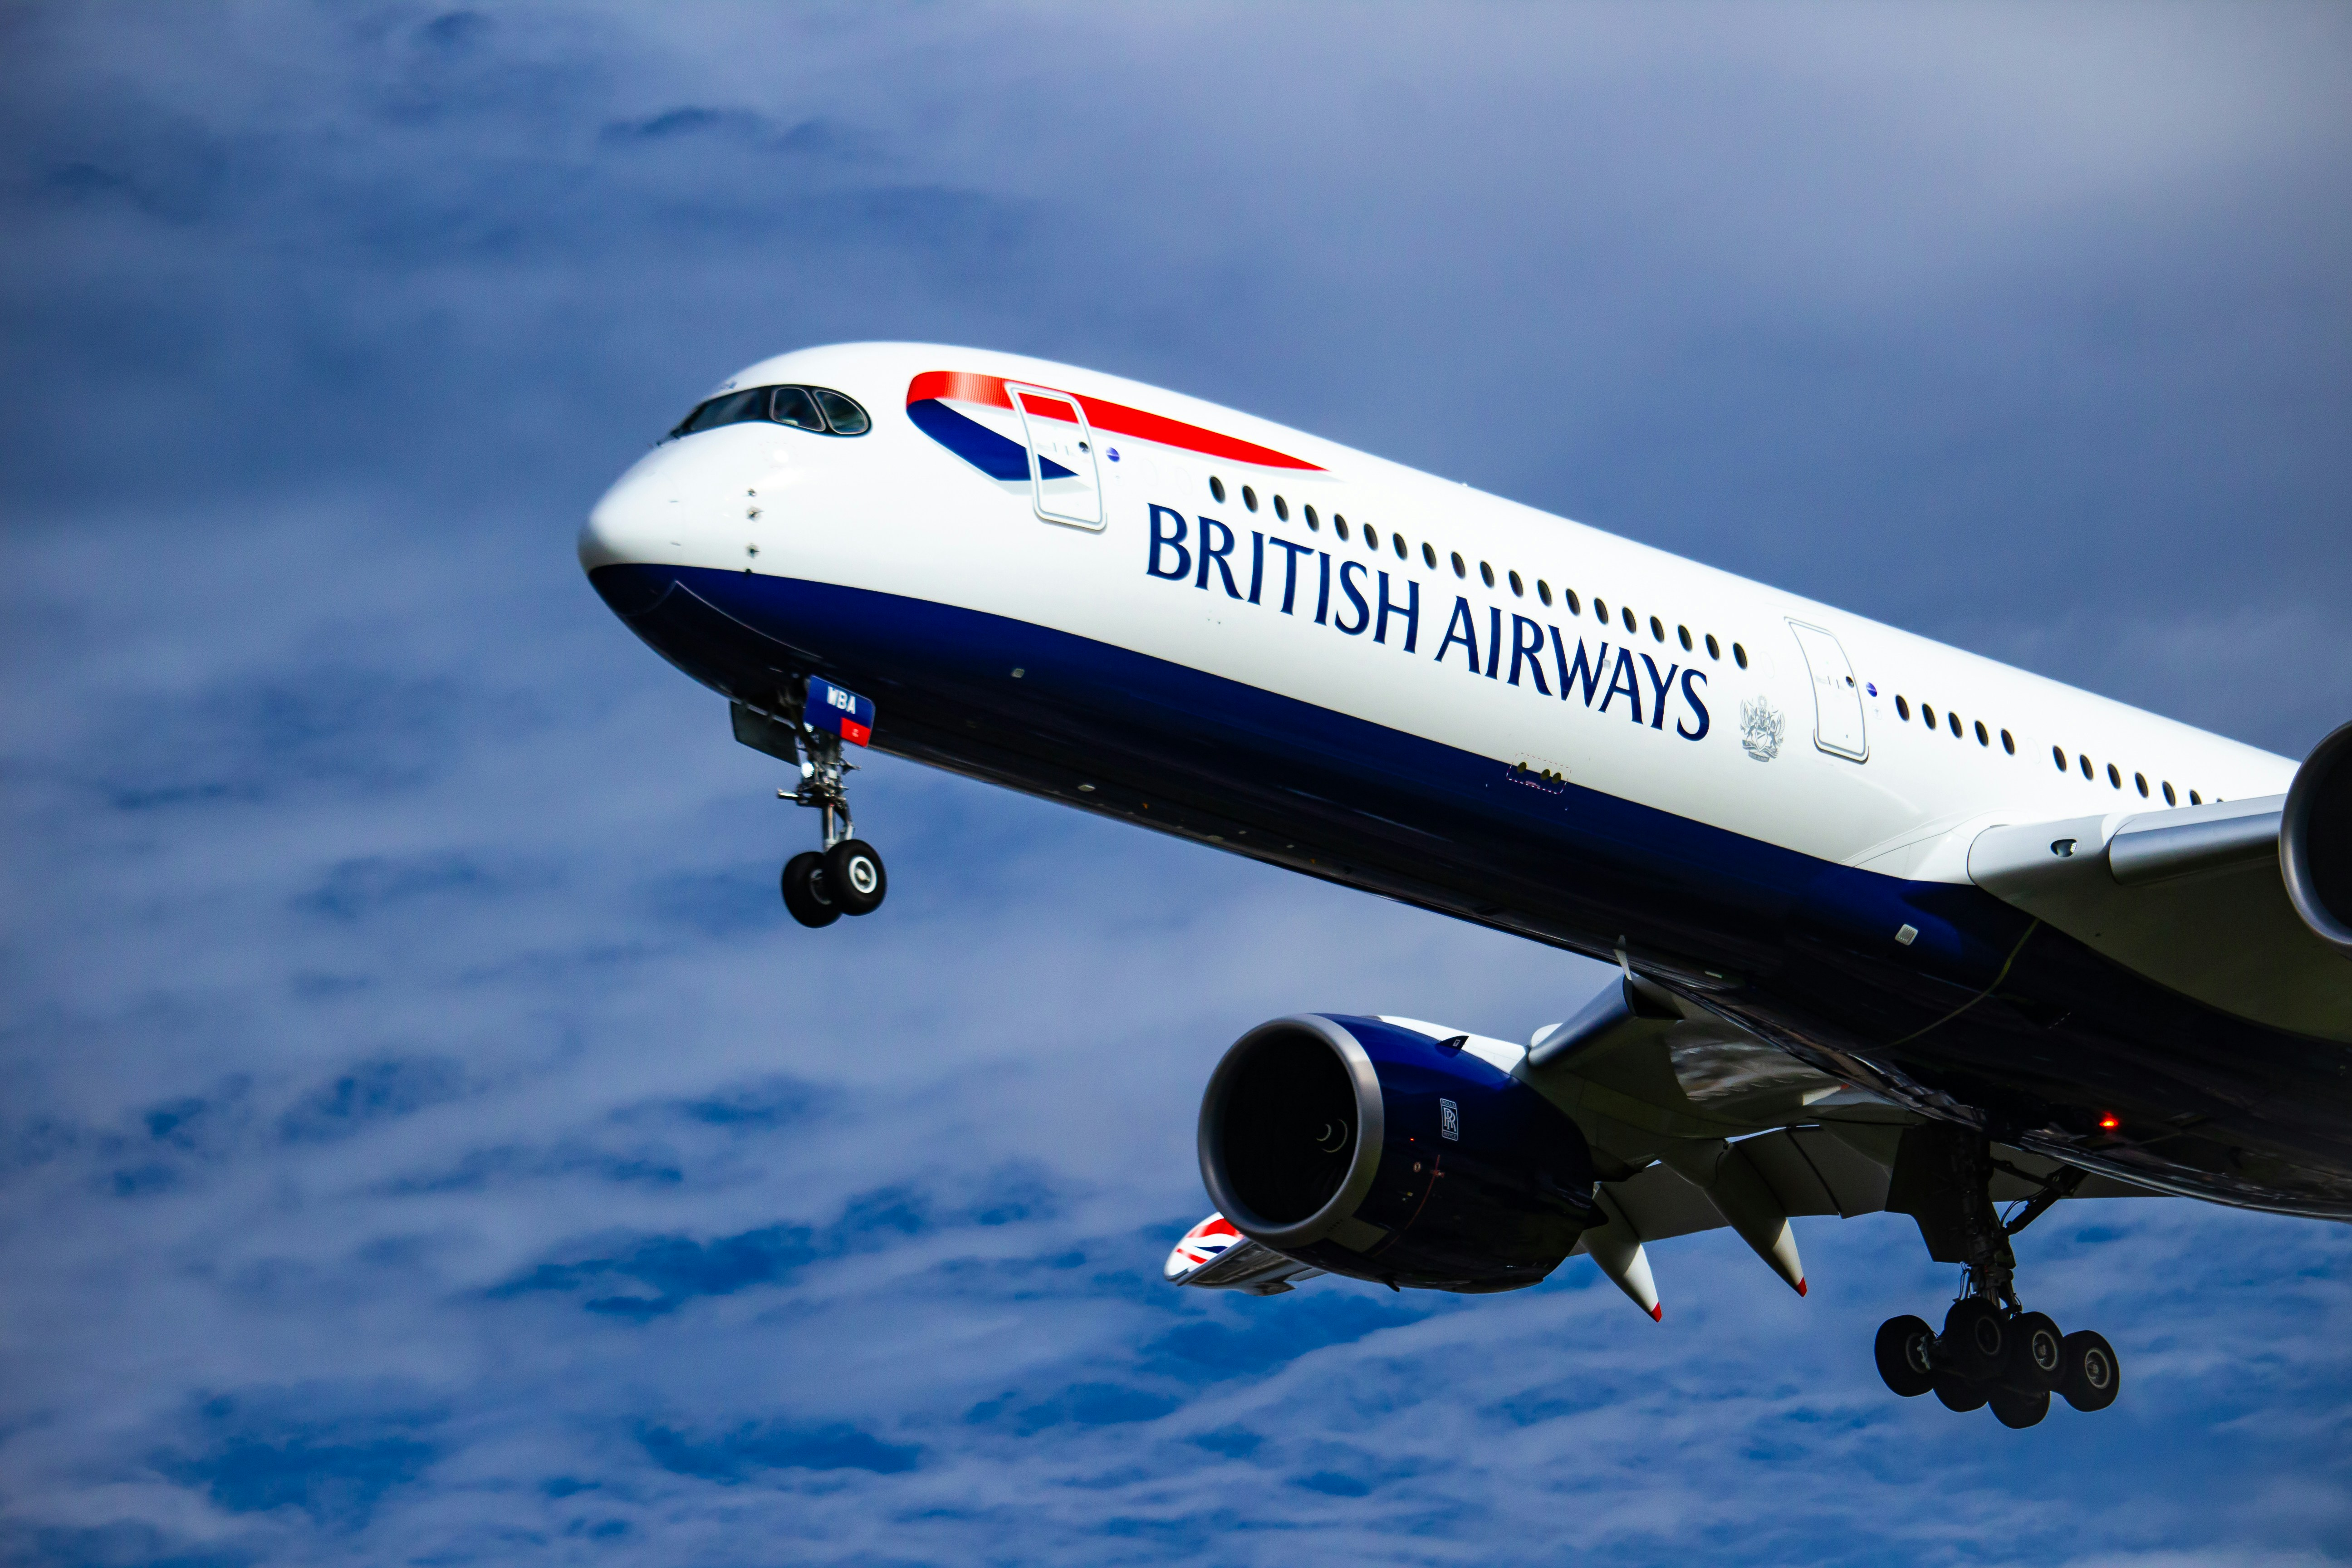

# Web scrarping and analysis 

## Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import time 

In [10]:
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import re

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

unique_reviews = set()
scraped_data = []

for i in tqdm(range(1, pages + 1), desc="Scraping Pages"):
    print(f"\nScraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        continue

    soup = BeautifulSoup(response.content, 'html.parser')
    reviews_on_page = soup.find_all("div", {"class": "text_content"})
    titles_on_page = soup.find_all("h2", {"class": "text_header"})
    dates_on_page = soup.find_all("time" , {"itemprop":"datePublished"})

    for idx, review in enumerate(reviews_on_page):
        review_text = review.get_text(strip=True)
        review_text = re.sub(r'\s+', ' ', review_text)  # Normalize whitespace

        if review_text not in unique_reviews:
            unique_reviews.add(review_text)

            review_title = titles_on_page[idx].get_text(strip=True) if idx < len(titles_on_page) else "No Title"
            review_date = dates_on_page[idx].get_text(strip=True) if idx < len(dates_on_page) else "No Date"

            scraped_data.append({
                "title": review_title,
                "date": review_date,
                "text": review_text
            })

    print(f"   ---> {len(scraped_data)} total unique reviews so far")

# Final data preview
print(f"\nTotal Reviews Scraped: {len(scraped_data)}")

Scraping Pages:   0%|                                                                           | 0/10 [00:00<?, ?it/s]


Scraping page 1


Scraping Pages:  10%|██████▋                                                            | 1/10 [00:03<00:27,  3.08s/it]

   ---> 100 total unique reviews so far

Scraping page 2


Scraping Pages:  20%|█████████████▍                                                     | 2/10 [00:05<00:21,  2.69s/it]

   ---> 200 total unique reviews so far

Scraping page 3


Scraping Pages:  30%|████████████████████                                               | 3/10 [00:07<00:17,  2.57s/it]

   ---> 300 total unique reviews so far

Scraping page 4


Scraping Pages:  40%|██████████████████████████▊                                        | 4/10 [00:09<00:14,  2.37s/it]

   ---> 400 total unique reviews so far

Scraping page 5


Scraping Pages:  50%|█████████████████████████████████▌                                 | 5/10 [00:12<00:12,  2.48s/it]

   ---> 500 total unique reviews so far

Scraping page 6


Scraping Pages:  60%|████████████████████████████████████████▏                          | 6/10 [00:15<00:09,  2.46s/it]

   ---> 600 total unique reviews so far

Scraping page 7


Scraping Pages:  70%|██████████████████████████████████████████████▉                    | 7/10 [00:17<00:07,  2.50s/it]

   ---> 700 total unique reviews so far

Scraping page 8


Scraping Pages:  80%|█████████████████████████████████████████████████████▌             | 8/10 [00:19<00:04,  2.41s/it]

   ---> 800 total unique reviews so far

Scraping page 9


Scraping Pages:  90%|████████████████████████████████████████████████████████████▎      | 9/10 [00:22<00:02,  2.41s/it]

   ---> 900 total unique reviews so far

Scraping page 10


Scraping Pages: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.50s/it]

   ---> 1000 total unique reviews so far

Total Reviews Scraped: 1000


In [20]:
BA_reviews = pd.DataFrame(scraped_data)
BA_reviews

,title,date,text
0,"""substituted clotted cream for butter""",10th July 2025,✅Trip Verified| Check in and security were qui...
1,“service was inconsistent”,5th July 2025,Not Verified| I recently flew business class w...
2,“consistently incorrect information”,4th July 2025,Not Verified| They lost my bag and took 20 day...
3,"""I was very disappointed""",23rd June 2025,Not Verified| Paid to upgrade to business clas...
4,“great service from the crew”,23rd June 2025,Not Verified| Decided to use point to upgrade ...
...,...,...,...
995,"""such a pleasant experience""",7th October 2019,✅Trip Verified| For a long time I have avoided...
996,"""Another pleasant flight""",6th October 2019,✅Trip Verified| Austin to London. Another plea...
997,"""Better than I was expecting""",6th October 2019,✅Trip Verified| London to Kuala Lumpur. Better...
998,"""zero customer service""",3rd October 2019,Not Verified| I wish I could give a zero. I wa...


In [ ]:
BA_reviews.to_csv("British_airways_reviews.csv", index = False, encoding = 'utf-8')